``Project_2`` :
--

**time limit : 90 mins**

Little detail about IPL (Indian Premier League). The Indian Premier League (IPL), officially Vivo Indian Premier League for sponsorship reasons, is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008, and is regarded as the brainchild of Lalit Modi, the founder and former commissioner of the league. IPL has an exclusive window in ICC Future Tours Programme. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of IPL in 2018 was US Dollar 6.3 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed Rs11.5 billion (US Dollar 182 million) to the GDP of the Indian economy. There have been eleven seasons of the IPL tournament. The current IPL title holders are the Chennai Super Kings, who won the 2018 season. The most successful franchises in the tournament are the Chennai Super Kings and Mumbai Indians with 3 tournament wins each.

**1st Update** : Data of 2019 are ``not included`` in the dataset. Winners of 2019 were ``Mumbai Indians`` 

In [1]:
# loading the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('datasets/matches.csv')

# get a feel of the data
# Selecting top 3 rows from the dataframe
df.head(3)

# dl_applied -> means duckworth lewis technique applied or not.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
# Fetching number of rows in the dataframe
df.shape[0]

696

In [4]:
# Let's check the number of matches each team won till now in the IPL history.

df['winner'].sort_values().value_counts()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

**```Did you notice```** that we have "Rising Pune Supergiant" 2 times in the above list. One with the name as "Rising Pune Supergiant" and other as "Rising Pune Supergiants". Let's **``cleanse``** the data by modifying the "Rising Pune Supergiants" to "Rising Pune Supergiant". 

*Also, it can be present in other columns as well like 'team1', 'team2' , 'toss_winner'. Lets replace in all the columns at once. Though, it can be done in many ways, we will use the apply() function to do so.*

In [5]:
# replacing only under column 'winner'
df.loc[df['winner'] == 'Rising Pune Supergiants', 'winner'] = 'Rising Pune Supergiant'


# Q1> replace in other series as well like 'team1', 'team2',toss_winner, winner.
# use apply()


In [1]:
# Q2> Again find the numbers of wins for each team.
# Note : this time we should see only 'Rising Pune Supergiant'



In [2]:
# Q3> plot a simple bar-Graph for the winners.

# use df_winner dataframe
# df_winner = df['winner'].sort_values().value_counts()



Let's do some analysis on **``relation between winning the toss and the match``**. Let's find total number of times/matches where a team won the toss and also won the match. Also, we will find the opposite as well. Number of times team won the toss and lost the match.

In [16]:
# case where team won the toss and also won the match
winning_toss_winning_match = df[(df['toss_winner'] == df['winner'])]
winning_toss_winning_match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
# Q4> find where team won the toss but lost the match ?



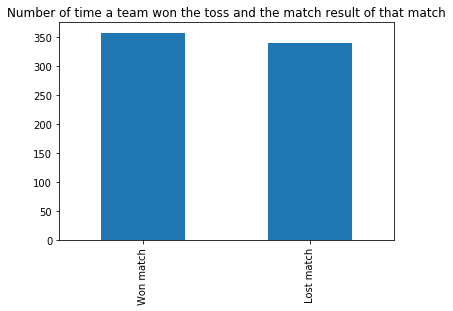

In [19]:
# Q5> Create a new dataframe containing details of winning_toss_winning_match 
#     and winning_toss_losing_match  teams. Plot a simple bar graph. 
#     Keep the title as "Number of time a team won the toss and the match result of that match"  



#Let's plot the above obervations



**``Observation``** : From above analysis, we can say that there is **no significant impact of toss on the match result**.

Now, Lets discuss on ``team winning the toss and choosing to bat and bowl first``. We will analyse which had more success with winning the toss and batting first and which team had more success when they choose to bowl first.

In [25]:
# Q6> Check how many times team winning the toss and  batting first won 
#     and how many times team bowling first won ? <already solved>

# Hint : 
#  For this we have to check if the team won the toss and toss_decision 
#  is bat/field and winning team is toss_winner or not.

team_batting_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'bat'), ['id', 'winner']]

team_fielding_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field'),  ['id', 'winner']]

team_fielding_first_won_df= team_fielding_first_won['winner'].value_counts()

team_batting_first_won_df = team_batting_first_won['winner'].value_counts()

print("team_batting_first_won:\n", team_batting_first_won_df)
print("------------------------------------------------")
print("team_fielding_first_won:\n", team_fielding_first_won_df)

team_batting_first_won:
 Chennai Super Kings            29
Mumbai Indians                 22
Rajasthan Royals               15
Kolkata Knight Riders          15
Deccan Chargers                11
Delhi Daredevils               11
Royal Challengers Bangalore     9
Sunrisers Hyderabad             8
Kings XI Punjab                 6
Pune Warriors                   3
Name: winner, dtype: int64
------------------------------------------------
team_fielding_first_won:
 Kolkata Knight Riders          34
Royal Challengers Bangalore    30
Mumbai Indians                 28
Kings XI Punjab                26
Delhi Daredevils               24
Rajasthan Royals               22
Chennai Super Kings            21
Sunrisers Hyderabad            13
Gujarat Lions                  10
Deccan Chargers                 8
Rising Pune Supergiant          8
Kochi Tuskers Kerala            4
Name: winner, dtype: int64


In [4]:
# Q7> Plot 2 seperate bar graph's of team_batting_first_won 
#     & team_fielding_first_won.

# Note_1 : Keep title of the first graph as "Team winning toss, batting first and winning the match."



In [5]:
# # Note_2 : Keep title of the second graph as "Team winning toss, fielding first won the match."



**Watch the below o/p of**    ``df['city'].value_counts()``

In [33]:
df['city'].value_counts()

Mumbai            94
Kolkata           70
Delhi             67
Bangalore         66
Hyderabad         56
Chennai           49
Chandigarh        46
Jaipur            40
Pune              38
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Indore             9
Dharamsala         9
Johannesburg       8
Ranchi             7
Abu Dhabi          7
Bengaluru          7
Cuttack            7
Port Elizabeth     7
Cape Town          7
Raipur             6
Sharjah            6
Kochi              5
Kanpur             4
East London        3
Kimberley          3
Nagpur             3
Mohali             3
Bloemfontein       2
Name: city, dtype: int64

If you see above data, we have ``Bangalore`` and ``Bengaluru`` which refers to the same city.So we will replace "Banglaore" which is the old name of the city with **"Bengaluru"**.

In [6]:
# Q7> Change city name from Bangalore to Bengaluru. (Hint : use replace())

# Changing city name from Bangalore to Bengaluru. use .replace()


Let's analyse how **``"Duckworth–Lewis method"``** affects result of match based on team batting first or bowling first.

In [7]:
# Q8> Create a dataframe for mathches where result is decided by "Duckworth-Lewis method".
# name the dataframe as new_df

# Reference : What is Duckworth-Lewis method ?
# https://en.wikipedia.org/wiki/Duckworth%E2%80%93Lewis%E2%80%93Stern_method

# Creating a dataframe, which holds the records where the match result is decided by "Duckworth-Lewis method".




In [37]:
# Now we have to create a new column to decide which team has 
# batted first for each match. I am gonna create a function for it 
# and apply that function to the dataframe

def set_batting_first(team1, team2, toss_winner, toss_decision):
    if toss_decision == 'bat':
        return toss_winner
    else:
        if team1 == toss_winner:
            return team2
        else:
            return team1  

In [40]:
# Q9> Can u explain in your words, what does the below piece of code does ?

for items in new_df.loc[: , ['team1','team2','toss_winner','toss_decision','bat_first']].itertuples():
    new_df.loc[items[0] , 'bat_first'] = set_batting_first(items[1], items[2], items[3], items[4])
    
new_df.head()    


# Put your explaination here :
# 
# 

,id,team1,team2,toss_winner,toss_decision,dl_applied,winner,bat_first
56,57,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,1,Kolkata Knight Riders,Sunrisers Hyderabad
99,100,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,1,Kings XI Punjab,Delhi Daredevils
102,103,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,1,Chennai Super Kings,Kolkata Knight Riders
119,120,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,1,Delhi Daredevils,Kings XI Punjab
122,123,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,1,Kolkata Knight Riders,Kings XI Punjab


In [43]:
# Q10 > Now create 1 more column named "is_bat_first_win" which will have 
#       1 if the team batting first won and 0 if team batting 1 lost.
#  < already solved >
new_df['is_bat_first_win'] = 0
new_df.loc[new_df['bat_first'] == new_df['winner'],'is_bat_first_win'] = 1 

new_df['is_bat_first_win'].head(10)

56     0
99     0
102    0
119    0
122    0
148    1
251    0
280    0
290    0
488    0
Name: is_bat_first_win, dtype: int64

In [48]:
# Q11> Create a new dataframe dl_bat_first_win from new_df above with two results as :
# How many field_first_and_win ?
# How many bat_first_and_win ?
#  < already solved >
# Hint : use .index() to name O index as'field_first_wins' 
#        and name 1 as 'bat_first_wins'

# creating a new dataframe with just two results as below.
dl_bat_first_win = pd.DataFrame(new_df['is_bat_first_win'].value_counts())
dl_bat_first_win.index = ['field_first_wins','bat_first_wins']

dl_bat_first_win.head()

,is_bat_first_win
field_first_wins,14
bat_first_wins,5


In [8]:
# Q12> Plot a bar graph of the above dataframe dl_bat_first_win. 
#      Whats your observation like ?
# Did the team which choose fielding first or batting second won more often ?



**``Observation``** : Above figure shows the number of times "Duckworth–Lewis method" is applied and the team fielding first(or team batting second) won the match. This provided a direct connection between how "Duckworth–Lewis method" favours team batting second, *though the topic is still argued the most.*

A win margin of more than 100 runs or more than 8 wickets in T20 is considered huge. **Let's do an analysis on how many occassion**, a team has lost the match with more than 100 run or more than 8 tickets. 

**``NOTE``** : We are gonna ignore the matches in which "Duckworth–Lewis method" is applied.

In [52]:
# Q13> Create a new dataframe new_100r_or_8w_df which contains records where
#      where DL method is not applied and win margin is 100 
#      or more runs or more than 8 wickets.
#  < already solved >
# New dataframe where DL method is not applied and win margin is 100 or more runs or more than 8 wickets.
new_100r_or_8w_df = df.loc[ (df['dl_applied'] == 0) & ((df['win_by_runs'] > 99) | (df['win_by_wickets'] > 8)) , ['id','team1','team2','winner','win_by_runs','win_by_wickets']]

new_100r_or_8w_df.head()

,id,team1,team2,winner,win_by_runs,win_by_wickets
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,10
5,6,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,0,9
34,35,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,0,10
43,44,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146,0
53,54,Kings XI Punjab,Rising Pune Supergiant,Rising Pune Supergiant,0,9


In [53]:
# Q 14> Do as advised.

# add a new column to track the losing team 



# create a method to fetch the losing team from the dataframe
def check_losing_team(row):
    if row['team1'] == row['winner']:
        row['losing_team'] = row['team2']
        return row['team2']
    else:
        row['losing_team'] = row['team1']
        return row['team1']

    

# use the above method to correctly fill new_100r_or_8w_df['losing_team'] column
# Hint : use apply method. and keep axis = 1
# refr : https://thispointer.com/pandas-apply-apply-a-function-to-each-row-column-in-dataframe/
new_100r_or_8w_df['losing_team'] = new_100r_or_8w_df.apply(check_losing_team, axis = 1)
new_100r_or_8w_df.head()

,id,team1,team2,winner,win_by_runs,win_by_wickets,losing_team
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,10,Gujarat Lions
5,6,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,0,9,Gujarat Lions
34,35,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,0,10,Delhi Daredevils
43,44,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146,0,Delhi Daredevils
53,54,Kings XI Punjab,Rising Pune Supergiant,Rising Pune Supergiant,0,9,Kings XI Punjab


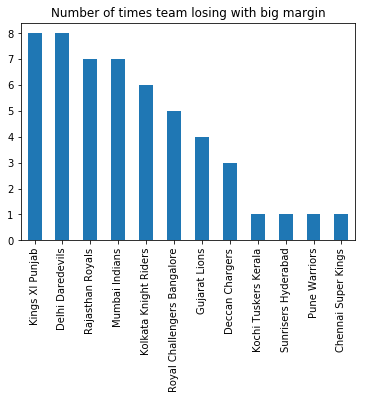

In [54]:
# Q15> Plot a bar graph showing Number of times team losing with big margin.
# Hint : first find value_counts() of new_100r_or_8w_df.losing_team
#        then use plot()
#  < already solved >
new_100r_or_8w_df.losing_team.value_counts().plot(kind = 'bar', title = 'Number of times team losing with big margin');

**Let's do analysis on Number of times a player got the ``Man of the Match`` till 2017 edition of IPL.**

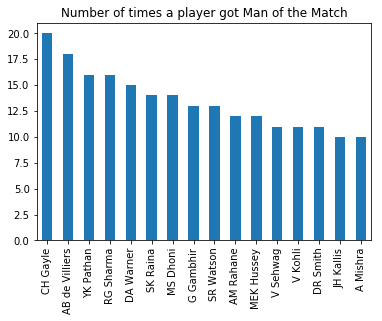

In [55]:
# Q16> Analyse only those players who got the Man-of-the-Match award 
#      atleast 10 times. Best way to analyse is to visualise a bar-graph.
#  < already solved >
# number of times the playes got Man of the match
mom_players = df.player_of_match.value_counts()

# now analyse only those players who got the award atleast 10 times.
# and plot a bar graph
mom_players[mom_players >= 10 ].plot(kind = 'bar', title = 'Number of times a player got Man of the Match');